Demonstrate measuring the nominal delay between the input and output DDS blocks.

In [1]:
import importlib
from mkids import TopSoc
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange
import Scan
soc = TopSoc()

In [2]:
fMixer = soc.fsIn/2/2
fMixer = 1800
#fMixer = 2842
soc.set_mixer(fMixer)

1800.0

In [24]:
fNyquist = soc.fsIn/2
print("fNyquist =",fNyquist)
nz = 1
fMixer = 500 + (nz-1)*fNyquist
fTones = np.array([fMixer + 100.123])
soc.set_mixer(fMixer)

fNyquist = 1228.8


500.00002441406247

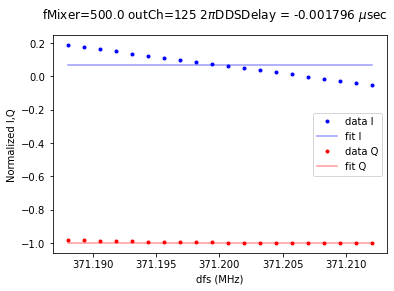

In [29]:
scan = Scan.Scan(soc)
outCh = 125
nominalDelay = scan.measureNominalDelay(outCh, decimation=2, doPlot=True)


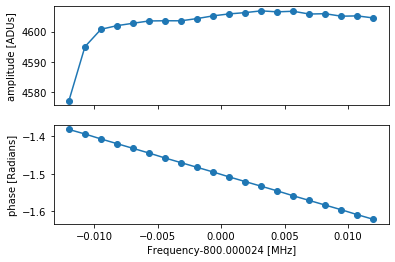

In [5]:
Scan.fscanPlot(scan.mndScan,0)

In [6]:
scan.applyDelay(scan.mndScan, nominalDelay)

 Scan applyDelay:  apply delay = -0.001800600706009625


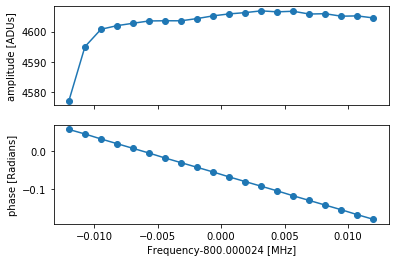

In [7]:
Scan.fscanPlot(scan.mndScan,0)

In [30]:
nz = 2
fMixer = 500 + (nz-1)*fNyquist
fTones = np.array([fMixer + 100.123])
soc.set_mixer(fMixer)

1728.8000244140624

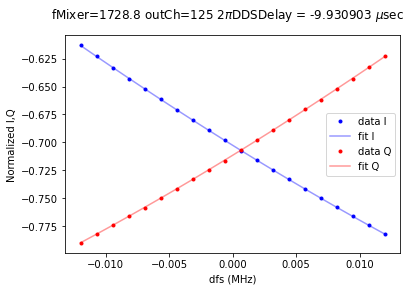

In [31]:
outCh = 125
nominalDelay = scan.measureNominalDelay(outCh, decimation=2, doPlot=True)


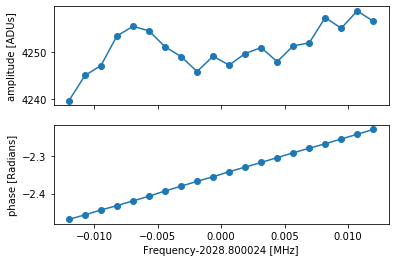

In [10]:
Scan.fscanPlot(scan.mndScan,0)

In [11]:
scan.applyDelay(scan.mndScan, nominalDelay)

 Scan applyDelay:  apply delay = -9.97560196426329


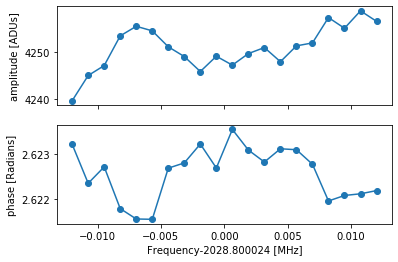

In [12]:
Scan.fscanPlot(scan.mndScan,0)

In [13]:
nz = 3
fMixer = 500 + (nz-1)*fNyquist
fTones = np.array([fMixer + 100.123])
soc.set_mixer(fMixer)

2957.6000244140623

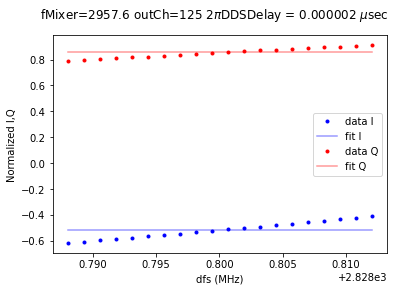

In [14]:
outCh = 125
nominalDelay = scan.measureNominalDelay(outCh, decimation=2, doPlot=True)


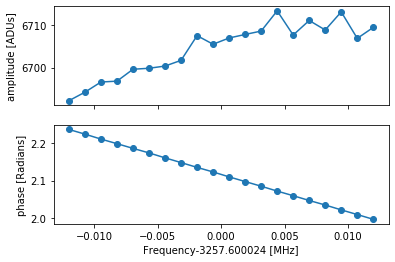

In [15]:
Scan.fscanPlot(scan.mndScan,0)

In [16]:
scan.applyDelay(scan.mndScan, nominalDelay)

 Scan applyDelay:  apply delay = 2.330863102460196e-06


  0%|          | 0/100 [00:00<?, ?it/s]

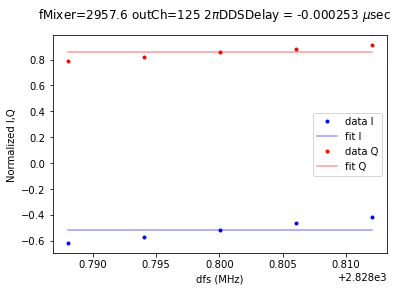

In [17]:
nToDo = 100
delays = np.zeros(nToDo)
for i in trange(nToDo):
    delays[i] = scan.measureNominalDelay(outCh, decimation=2, nf=5, doPlot=i==0)

In [18]:
scan.applyDelay(scan.mndScan, nominalDelay)

 Scan applyDelay:  apply delay = 2.330863102460196e-06


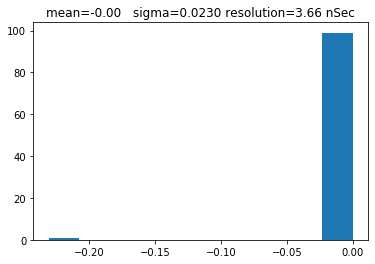

In [19]:
plt.hist(delays)
resolution = 1000*delays.std()/(2*np.pi)
_ = plt.title("mean=%.2f   sigma=%.4f resolution=%.2f nSec"%(delays.mean(),delays.std(), resolution))